In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
def cargadedatos():
    carga = files.upload()
    archivo = list(carga.keys())[0] # para el nombre del archivo
    proyecto = pd.read_csv(archivo)
    return proyecto

In [ ]:
data=cargadedatos()

Saving houses_to_rent_v2.csv to houses_to_rent_v2 (3).csv


In [ ]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,property_tax,fire_insurance,total
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
print(data.shape)


(10692, 13)


In [ ]:
tipos=data.dtypes
print(tipos)

city              object
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa                int64
rent               int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object


In [ ]:
data["city"].value_counts()
#mayoria de datos en sao paulo

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [ ]:
data['floor'].unique()# nos muestra un - que debemos eliminar. Find the unique elements of an array.

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [ ]:
data.loc[data['floor']=='-','floor'] = 0

In [ ]:
data_acp = data[data['city']=='São Paulo'] #Para acotar nuestro análisis filtraremos únicamente los registros de Sao Paulo.
data_acp = data_acp[['area','rooms','bathroom','parking spaces','floor','hoa','rent','property_tax','fire_insurance','total']]
#Para ésta técnica únicamente requerimos de las variables numéricas, por lo cual excluimos del análisis las variables animal y furnished

In [ ]:
data_acp.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,property_tax,fire_insurance,total
count,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000
mean,158.899439,2.558859,2.467641,1.877527,1169.627994,4652.793783,495.701716,62.428911,6380.831833
std,347.474169,1.166365,1.503060,1.687973,4076.461180,3634.612007,4153.618928,50.073429,7541.320897
min,11.000000,1.000000,1.000000,0.000000,0.000000,500.000000,0.000000,4.000000,508.000000
25%,59.000000,2.000000,1.000000,1.000000,0.000000,2000.000000,37.000000,26.000000,2631.000000
50%,106.000000,3.000000,2.000000,1.000000,665.000000,3400.000000,170.000000,45.000000,4596.000000
75%,212.000000,3.000000,4.000000,3.000000,1608.500000,6000.000000,550.000000,83.000000,8591.000000
max,24606.000000,10.000000,10.000000,12.000000,220000.000000,45000.000000,313700.000000,677.000000,316900.000000


<ipython-input-29-79c178d8975e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_acp.corr(),annot = True)


<Axes: >

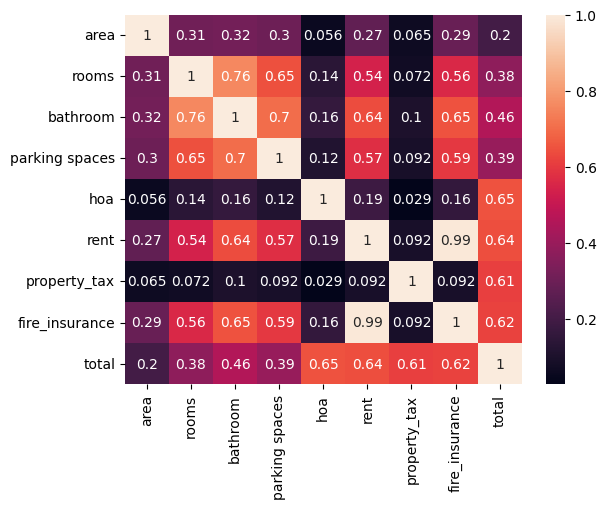

In [ ]:
sns.heatmap(data_acp.corr(),annot = True)

In [ ]:
data_acp = data_acp[['area','rooms','bathroom','parking spaces','floor','hoa','rent']] # En este punto podemos quedarnos únicamente con las variables hoa y rent las cuales contienen suficiente información para entender los costos.

In [ ]:
data_acp["variable1"] = 1